NLP has the goal of deriving information out of natural language (form sequences text or speech).

NLP problems are known as sequence to sequence problems (seq2seq).

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d2fd9c30-4b2b-f12f-4b95-c616253131b5)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-06-21 23:20:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-21 23:20:27 (111 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

In [ ]:
# Use kaggle nlp intro dataset (twitter disaster tweet)

!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data('nlp_getting_started.zip')

--2022-06-21 23:20:30--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.192.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-06-21 23:20:30 (118 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Visualize a text dataset

import pandas as pd
import numpy as np
import tensorflow as tf

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
# Shuffle training data

train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
import random
random_index = random.randint(0, len(train_df)-5)

for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", '(real disaster)' if target > 0 else '(not real disaster)')
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
...//..// whao.. 12000 Nigerian refugees repatriated from Cameroon http://t.co/HuhWPmryWz

---

Target: 0 (not real disaster)
Text:
master0fsloths has a crush: http://t.co/SZX6v0bbjF

---

Target: 1 (real disaster)
Text:
Aircraft debris confirmed to be from MH370 - Nation | The Star Online http://t.co/heS0bPU60Y

---

Target: 0 (not real disaster)
Text:
Wtf? Her biological father is holding her hostage and her adoptive parents haven't even looked for her. Criminal minds got me fucked up.

---

Target: 0 (not real disaster)
Text:
'I tried to save Mido Macia': One of the murder accused has testified he tried to save Mido MaciaÛªs life. http://t.co/vxVfAEEY0q

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [ ]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

We shall convert our sentences into numbers via tokenization

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# example of default textvectorization parameters

text_vectorization = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <OOV>)
                                        standardize='lower_and_strip_punctuation',
                                        split='whitespace',
                                        ngrams=None, # create groups of n-words
                                        output_mode='int',
                                        output_sequence_length=None, # how long you want your sequences to be
                                        # pad_to_max_tokens=True # only used when max_tokens is being set
                                       )


In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# find the average number of tokens (words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# setup text vectorization variables

max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g how many words from a tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text veectorizer to training text

text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from training data and tokenize it

random_sentence = random.choice(train_sentences)
print(f"Original Text:\n {random_sentence}\
        \n\n Vectorized sentence:")

text_vectorizer([random_sentence])

Original Text:
 @HearItFromPa Also pls help us w/ our campaign to warn the public about the hazardous keratin treatments. The Brazilian Blowout COPYCATS.        

 Vectorized sentence:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,  336, 2796,  148,   69,  308,  103, 2531,    5, 3263,    2,
         926,   54,    2,  511]])>

In [ ]:
# get unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words in vocab: {top_5_words}")
print(f"5 least common words in vocab: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
5 least common words in vocab: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


Now we will create embedding to turn tokenized text into embedding vectors.

We will embed using embedding layer
Important parameters:
1. input_dim = the size of our vocabulary
2. output_dim = the size of the output embedding vector, (e.g a value of 100 means that each token gets represented by a vector of length 100)
3. input_length = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128, # set to a number divisible by 8
                             input_length=max_length)

embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence ( turn it into dense vectors of fixed size)

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 A young heavyweight rapping off of detonate I been a leader not a lemon better get it straight ??        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01182454,  0.0487738 , -0.00132646, ..., -0.04095899,
          0.03358522, -0.02007678],
        [ 0.0400529 , -0.0253121 , -0.03710928, ..., -0.00476837,
         -0.00136345, -0.04718352],
        [ 0.02646002, -0.02894971, -0.01822377, ..., -0.02618322,
         -0.02741423,  0.04813552],
        ...,
        [ 0.01182454,  0.0487738 , -0.00132646, ..., -0.04095899,
          0.03358522, -0.02007678],
        [-0.03628442,  0.01188965,  0.04164651, ..., -0.02691101,
          0.01615917,  0.0413182 ],
        [-0.02273284, -0.01041701, -0.04036831, ..., -0.01431387,
         -0.0261867 ,  0.04682029]]], dtype=float32)>

In [ ]:
# checkout a single token embedding (this is for the first word of the sentence)

sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 1.1824537e-02,  4.8773799e-02, -1.3264641e-03, -4.4280935e-02,
         3.9890613e-02, -2.7232682e-02,  1.5998650e-02, -2.0722127e-02,
        -4.3734789e-02, -3.9288640e-02,  3.3824373e-02,  2.5081087e-02,
         1.1285543e-03,  2.4776570e-03, -2.6314009e-02, -4.1583799e-02,
        -2.0868767e-02, -2.2269381e-02,  1.6310874e-02,  3.1367604e-02,
        -3.5856254e-03,  7.3812492e-03, -2.2937680e-02, -9.6552446e-04,
         4.0967587e-02, -2.6207078e-02, -4.9192429e-02,  6.1642043e-03,
         2.7207542e-02, -2.3447812e-02,  4.8634280e-02,  3.8328219e-02,
         4.4506598e-02,  4.8650157e-02, -3.5649527e-02,  1.2495294e-03,
        -3.1780183e-02, -3.3773325e-02,  2.0322327e-02,  1.5953038e-02,
         2.2595335e-02,  1.1663068e-02,  3.0117121e-02,  4.4891983e-04,
         1.0635115e-02, -3.8845383e-02, -1.3811886e-02,  3.7456524e-02,
        -8.5330382e-03, -3.4750104e-03, -8.3262697e-03,  1.8440392e-02,
         2.1107

In [ ]:
# Baseline model (naive bayes with tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()), # convert words into numbers using tfidf
                    ('clf', MultinomialNB()) # model the text
])

model_0.fit(train_sentences, train_labels)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate baseline model

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieved an accuracy score of: {baseline_score*100:.2f}%")

Our baseline model achieved an accuracy score of: 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
# Build a function to track our models results and evaluating them on accuracy, precision, recall, f1-score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  # accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  # precision, recall and f1-score using weighted average
  model_precision , model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}


Now we shall proceed to model_1: Feed forward neural network (dense model)

In [ ]:
# Create a tensorboard callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1 dimensional string
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create embedding of inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20220621-232038
Epoch 1/5
215/215 [==============================] - 9s 10ms/step - loss: 0.6126 - accuracy: 0.6916 - val_loss: 0.5363 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4418 - accuracy: 0.8181 - val_loss: 0.4686 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3466 - accuracy: 0.8621 - val_loss: 0.4590 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2837 - accuracy: 0.8905 - val_loss: 0.4679 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2372 - accuracy: 0.9117 - val_loss: 0.4798 - val_accuracy: 0.7848


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7848


[0.47983670234680176, 0.7847769260406494]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [ ]:
# Convert prediction probability into labels

model_1_pred = tf.squeeze(tf.round(model_1_pred_probs))
model_1_pred

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_1_results = calculate_results(val_labels,
                                    model_1_pred)
model_1_results

{'accuracy': 78.4776902887139,
 'f1': 0.7827022002767159,
 'precision': 0.7870511640590381,
 'recall': 0.7847769028871391}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
# Visualizing learned embedding
# get the vocabulary from the text vectorization layer

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# get the weight matrix of embedding layer

embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape

(10000, 128)

Now we have the embedding matrix our model has learnedto repreent our tokens, let's see how we can visualize it.

We can use tensorflow projector

In [ ]:
# Create embedding files
import io 

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recurrent Neural Networks
RNN are useful for sequence data.

Premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input

In [ ]:
# Building model_2, an LSTM RNN model

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(units=64, return_sequences=True)(x) # when stacking RNN cells, need to return sequences
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220621-232102
Epoch 1/5
215/215 [==============================] - 6s 8ms/step - loss: 0.2209 - accuracy: 0.9190 - val_loss: 0.5944 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1534 - accuracy: 0.9419 - val_loss: 0.5793 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1282 - accuracy: 0.9531 - val_loss: 0.7630 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1041 - accuracy: 0.9584 - val_loss: 0.7762 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0876 - accuracy: 0.9637 - val_loss: 0.7904 - val_accuracy: 0.7822


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs

array([[8.29527825e-02],
       [8.58333528e-01],
       [9.99746501e-01],
       [1.09039493e-01],
       [1.18071889e-03],
       [9.96035874e-01],
       [7.74803877e-01],
       [9.99837279e-01],
       [9.99651670e-01],
       [4.93561119e-01],
       [2.03403970e-03],
       [8.88809562e-01],
       [1.22034829e-03],
       [2.70359665e-01],
       [3.22622538e-04],
       [6.32098913e-02],
       [5.22336736e-03],
       [1.81734026e-03],
       [1.30626723e-01],
       [9.97658014e-01],
       [9.96128917e-01],
       [9.63796221e-04],
       [9.83570814e-01],
       [2.36427151e-02],
       [9.99529958e-01],
       [9.99806941e-01],
       [2.93613914e-02],
       [6.32700883e-03],
       [1.94906176e-03],
       [2.46436268e-01],
       [9.41227078e-01],
       [3.28803547e-02],
       [1.77301958e-01],
       [1.82384364e-02],
       [6.45724595e-01],
       [2.44226336e-01],
       [9.99526620e-01],
       [2.85021514e-01],
       [9.05335769e-02],
       [9.99686837e-01],


In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 78.21522309711287,
 'f1': 0.7804155135464126,
 'precision': 0.7835553063606987,
 'recall': 0.7821522309711286}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
# Building model_3: GRU RNN model (gated recurrent unit)

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# print(x.shape)
# x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.GRU(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220621-232114
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1635 - accuracy: 0.9299 - val_loss: 0.7067 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0836 - accuracy: 0.9683 - val_loss: 0.7924 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0695 - accuracy: 0.9727 - val_loss: 0.9997 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0616 - accuracy: 0.9752 - val_loss: 1.0124 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0553 - accuracy: 0.9765 - val_loss: 1.1159 - val_accuracy: 0.7730


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs

array([[7.94338237e-04],
       [8.00526977e-01],
       [9.99880910e-01],
       [6.45563900e-02],
       [1.80755567e-04],
       [9.99713838e-01],
       [9.82599854e-01],
       [9.99945045e-01],
       [9.99912024e-01],
       [6.04783058e-01],
       [7.72045110e-04],
       [9.31267917e-01],
       [5.30900783e-04],
       [2.11227074e-01],
       [3.46031477e-04],
       [3.81248677e-03],
       [1.28083571e-03],
       [5.60517074e-04],
       [2.94311643e-02],
       [9.99842048e-01],
       [9.99160528e-01],
       [5.49719844e-05],
       [9.99731839e-01],
       [3.16188275e-03],
       [9.99907136e-01],
       [9.99920130e-01],
       [1.08351954e-03],
       [1.29856635e-03],
       [4.67773702e-04],
       [4.50408697e-01],
       [9.99285281e-01],
       [1.59265066e-03],
       [2.35981628e-01],
       [4.37842263e-03],
       [5.63262045e-01],
       [3.78840655e-01],
       [9.99843478e-01],
       [1.50631636e-01],
       [5.79528734e-02],
       [9.99917507e-01],


In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'f1': 0.7710949612836401,
 'precision': 0.7742755789705,
 'recall': 0.7729658792650919}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
# Model_4 bidirectional RNN model

inputs = layers.Input(shape=(1,),  dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs, name='model_4_bidrectional_RNN')

In [ ]:
model_4.summary()

Model: "model_4_bidrectional_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_4_bidrectional_RNN')])

Saving TensorBoard log files to: model_logs/model_4_bidrectional_RNN/20220621-232124
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1054 - accuracy: 0.9657 - val_loss: 0.9123 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0520 - accuracy: 0.9764 - val_loss: 1.2093 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0451 - accuracy: 0.9790 - val_loss: 1.3446 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0431 - accuracy: 0.9807 - val_loss: 1.4451 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0455 - accuracy: 0.9796 - val_loss: 1.1470 - val_accuracy: 0.7730


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs

array([[2.66032219e-01],
       [5.30036032e-01],
       [9.99976754e-01],
       [2.49328747e-01],
       [3.57999699e-04],
       [9.99595225e-01],
       [9.53794658e-01],
       [9.99986410e-01],
       [9.99973893e-01],
       [7.69403577e-01],
       [7.22731987e-04],
       [9.41704988e-01],
       [8.47480085e-04],
       [3.32804799e-01],
       [3.04864603e-04],
       [1.79991908e-02],
       [8.75173311e-04],
       [9.56986623e-04],
       [1.27540857e-01],
       [9.99757707e-01],
       [9.99882579e-01],
       [2.74841936e-04],
       [9.99937057e-01],
       [2.15856475e-03],
       [9.99908447e-01],
       [9.99980092e-01],
       [9.30616690e-04],
       [1.24678640e-02],
       [1.38386118e-03],
       [3.67995203e-01],
       [9.98720825e-01],
       [5.90797653e-03],
       [2.58625429e-02],
       [7.10220635e-03],
       [5.00897825e-01],
       [2.96098679e-01],
       [9.99941349e-01],
       [3.47387969e-01],
       [1.24629349e-01],
       [9.99965906e-01],


In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 77.29658792650919,
 'f1': 0.7722420798695805,
 'precision': 0.7727060691282619,
 'recall': 0.7729658792650919}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

Convolutional Neural networks for text (and other types of sequences)

We've used CNNs for images but images are typically 2D. However, our text data is 1D.



In [ ]:
# Model 5 Conv1D testing (just to see shape)

embedding_test = embedding(text_vectorizer(['this is a test sentence']))

conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        activation='relu',
                        padding='valid') # choose 'same' to preserve shape

conv_1d_output = conv_1d(embedding_test)

max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04154182, -0.01096739,  0.07821174, ..., -0.07930182,
          0.07679189,  0.07390357],
        [-0.05109725, -0.03260261, -0.01465967, ..., -0.040549  ,
          0.0103075 , -0.05024635],
        [ 0.00131252, -0.01125009, -0.02821446, ..., -0.07308997,
          0.04338907,  0.01456739],
        ...,
        [ 0.03978982,  0.01195832,  0.01941083, ...,  0.03025893,
         -0.01531676,  0.00589133],
        [ 0.03978982,  0.01195832,  0.01941083, ...,  0.03025893,
         -0.01531676,  0.00589133],
        [ 0.03978982,  0.01195832,  0.01941083, ...,  0.03025893,
         -0.01531676,  0.00589133]]], dtype=float32)>

In [ ]:
conv_1d_output 

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.05693575, 0.02668294, 0.08643003, 0.04766344,
         0.07067975, 0.        , 0.01706591, 0.        , 0.        ,
         0.01353133, 0.        , 0.02455726, 0.        , 0.06703348,
         0.        , 0.10944051, 0.        , 0.        , 0.07566262,
         0.        , 0.        , 0.        , 0.04674651, 0.00836219,
         0.        , 0.        , 0.0401409 , 0.00563784, 0.01416655,
         0.02261741, 0.00807388],
        [0.00120058, 0.02406594, 0.03544592, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.01647995,
         0.06890422, 0.07290798, 0.        , 0.03229124, 0.        ,
         0.01746385, 0.        , 0.        , 0.        , 0.05425458,
         0.        , 0.        , 0.0661867 , 0.        , 0.        ,
         0.        , 0.        , 0.01981272, 0.        , 0.01640467,
         0.03286071, 0.00177239],
        [0.        , 0.        , 0.01774967, 0.0270

In [ ]:
max_pool_output 

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.00120058, 0.05693575, 0.03544592, 0.08643003, 0.04766344,
        0.07067975, 0.02824335, 0.034584  , 0.02807853, 0.01647995,
        0.06890422, 0.07290798, 0.02455726, 0.03229124, 0.06703348,
        0.04172496, 0.10944051, 0.03222004, 0.03690894, 0.07566262,
        0.00804117, 0.01183891, 0.0689695 , 0.04674651, 0.1059944 ,
        0.        , 0.07787772, 0.0401409 , 0.03462484, 0.01640467,
        0.03286071, 0.02502298]], dtype=float32)>

In [ ]:
# Model_5 Conv1D

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  activation='relu',
                  padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, output, name='Model_5_conv1D')

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_5.summary()

Model: "Model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_5_conv1D')])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20220621-232143
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1216 - accuracy: 0.9622 - val_loss: 0.9105 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0733 - accuracy: 0.9737 - val_loss: 1.0725 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0598 - accuracy: 0.9771 - val_loss: 1.1955 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0539 - accuracy: 0.9781 - val_loss: 1.2217 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0502 - accuracy: 0.9788 - val_loss: 1.2355 - val_accuracy: 0.7572


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 75.7217847769029,
 'f1': 0.7562528493391418,
 'precision': 0.7569390398906188,
 'recall': 0.7572178477690289}

In [ ]:
# Using transfer learning for NLP (model_6 pretrained sentence encoder)

import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence, 'all hail the best of all'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create a keras layer using the USE pretrained layer from tensorflow hub

sentence_encode_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                       input_shape=[],
                                       dtype='string',
                                       trainable=False,
                                       name='model_6_use')

In [ ]:
# Create model_6 USE

model_6 = tf.keras.Sequential([
                               sentence_encode_layer,
                               layers.Dense(64, activation='relu'),
                               layers.Dense(1, activation='sigmoid', name='output_layer')
], name='model_6_USE')

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_use (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20220621-232209
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.4995 - accuracy: 0.7828 - val_loss: 0.4494 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4155 - accuracy: 0.8136 - val_loss: 0.4409 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4003 - accuracy: 0.8215 - val_loss: 0.4378 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3930 - accuracy: 0.8240 - val_loss: 0.4272 - val_accuracy: 0.8202
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3844 - accuracy: 0.8289 - val_loss: 0.4259 - val_accuracy: 0.8136


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'f1': 0.8129452568428948,
 'precision': 0.813881331804605,
 'recall': 0.8136482939632546}

In [ ]:
# # Using 10% of data on model_7

# train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent )

In [ ]:
# Fixing data leakage and retrain our model_7

train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]

train_labels_10_percent = train_labels[:train_10_percent_split]


In [ ]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# To recreate a model same as previous, use tf.keras.models.clone_model()

model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_7_USE_10_percent_correct')])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent_correct/20220621-232228
Epoch 1/5
22/22 [==============================] - 3s 58ms/step - loss: 0.6651 - accuracy: 0.7212 - val_loss: 0.6412 - val_accuracy: 0.7546
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5902 - accuracy: 0.8088 - val_loss: 0.5817 - val_accuracy: 0.7625
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5137 - accuracy: 0.8204 - val_loss: 0.5288 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4541 - accuracy: 0.8307 - val_loss: 0.4999 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4153 - accuracy: 0.8336 - val_loss: 0.4871 - val_accuracy: 0.7795


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.95275590551181,
 'f1': 0.7777699173240801,
 'precision': 0.7808713829501961,
 'recall': 0.7795275590551181}

In [ ]:
# Compare performance of each model

In [ ]:
all_model_results = pd.DataFrame({'0_baseline': baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_LSTM': model_2_results,
                                  '3_GRU': model_3_results,
                                  '4_bidrectional': model_4_results,
                                  '5_conv1D': model_5_results,
                                  '6_tf_hub_USE': model_6_results,
                                  '7_tf_hub_USE_10_percent': model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.477690,0.787051,0.784777,0.782702
2_LSTM,78.215223,0.783555,0.782152,0.780416
3_GRU,77.296588,0.774276,0.772966,0.771095
4_bidrectional,77.296588,0.772706,0.772966,0.772242
5_conv1D,75.721785,0.756939,0.757218,0.756253
6_tf_hub_USE,81.364829,0.813881,0.813648,0.812945
7_tf_hub_USE_10_percent,77.952756,0.780871,0.779528,0.777770


In [ ]:
# Rescale metrics

all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.784777,0.787051,0.784777,0.782702
2_LSTM,0.782152,0.783555,0.782152,0.780416
3_GRU,0.772966,0.774276,0.772966,0.771095
4_bidrectional,0.772966,0.772706,0.772966,0.772242
5_conv1D,0.757218,0.756939,0.757218,0.756253
6_tf_hub_USE,0.813648,0.813881,0.813648,0.812945
7_tf_hub_USE_10_percent,0.779528,0.780871,0.779528,0.777770


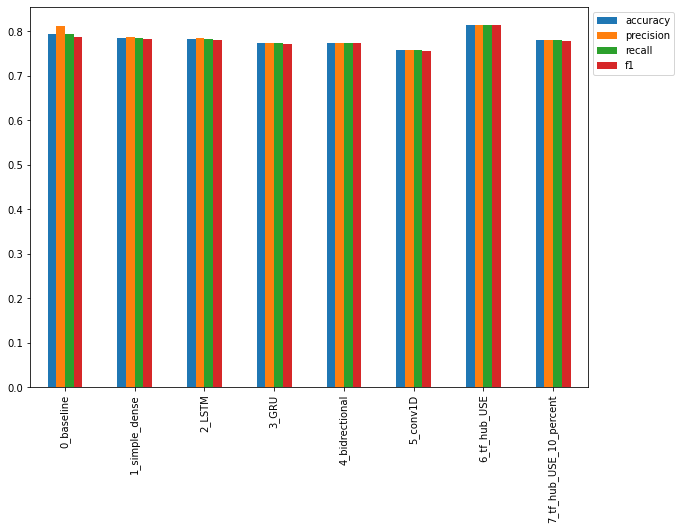

In [ ]:
all_model_results.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0));

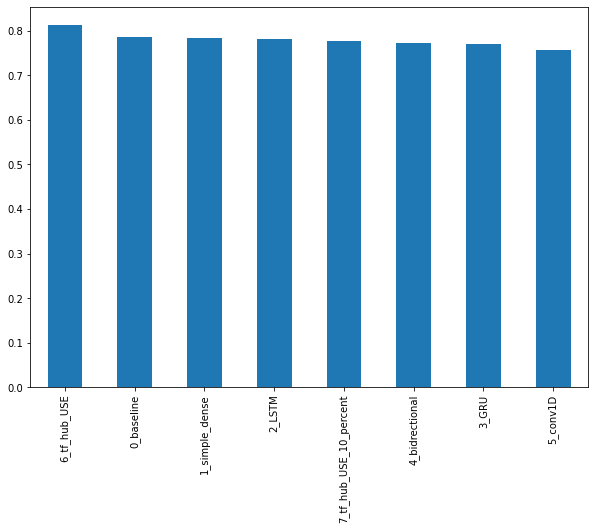

In [ ]:
# Sort model by f1-score

all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar', figsize=(10,7))

In [ ]:
# View results on tensorboard

!tensorboard dev upload --logdir ./model_logs/ \
  --name 'NLP Modelling experiments' \
  --description 'Comparing multiple different types of model architecture of twitter data' \
  --one_shot 


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) NO


In [ ]:
# Save and load a trained model via h5 (model_6)

model_6.save('model_6.h5')

In [ ]:
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
loaded_model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_use (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4259 - accuracy: 0.8136


[0.42592963576316833, 0.8136482834815979]

In [ ]:
model_6_results

{'accuracy': 81.36482939632546,
 'f1': 0.8129452568428948,
 'precision': 0.813881331804605,
 'recall': 0.8136482939632546}

In [ ]:
# Save our model in SaveModel format (default)

model_6.save('model_6_SaveModel_format')

INFO:tensorflow:Assets written to: model_6_SaveModel_format/assets


INFO:tensorflow:Assets written to: model_6_SaveModel_format/assets


In [ ]:
loaded_model_6_SaveModel = tf.keras.models.load_model('model_6_SaveModel_format')

In [ ]:
loaded_model_6_SaveModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 23ms/step - loss: 0.4259 - accuracy: 0.8136


[0.4259296655654907, 0.8136482834815979]

In [ ]:
# Find the most wrong examples

!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
unzip_data('08_model_6_USE_feature_extractor.zip')

--2022-06-21 23:29:57--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  92.6MB/s    in 15s     

2022-06-21 23:30:13 (59.9 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': model_6_pretrained_preds,
                       'pred_prob': tf.squeeze(model_6_pretrained_pred_probs)})
val_df

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.137074
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.095865
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
760,Crack in the path where I wiped out this morni...,0,1.0,0.612631


In [ ]:
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
...,...,...,...,...
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949


In [ ]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Text:\n{text}\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

Target: 0, Pred: 1.0, Prob: 0.8354544639587402
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

Target: 0, Pred: 1.0, Prob: 0.8108

In [ ]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Text:\n{text}\n")

Target: 1, Pred: 0.0, Prob: 0.06730347871780396
Text:
@DavidVonderhaar At least you were sincere ??

Target: 1, Pred: 0.0, Prob: 0.05507579818367958
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

Target: 1, Pred: 0.0, Prob: 0.05460336431860924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

Target: 1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

Target: 1, Pred: 0.0, Prob: 0.042086850851774216
Text:
I get to s

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
# Make prediction on test dataset

test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")

Pred: 0, Prob: 0.48534095287323
Text:
Ppl living w/ HIV have been charged with aggravated assault and bioterrorism for things w/ low or no risk of transmission. #HIVIsNotaCrime

Pred: 1, Prob: 0.8527683615684509
Text:
Attention Service Members Veterans Educators First Responders in Jacksonville FL http://t.co/4UrtBEAcE5

Pred: 1, Prob: 0.5125895142555237
Text:
@tim55081 @BootlegAlbano @ShaunKing I know. He profits off the deaths of the people he claims to be fighting for. He makes me sick.

Pred: 1, Prob: 0.9680105447769165
Text:
'The Latest: More Homes Razed by Northern California Wildfire' by THE ASSOCIATED PRESS via NYT http://t.co/rDF0ZuW7lZ

Pred: 0, Prob: 0.32109662890434265
Text:
Salvation Army bid to demolish cottages http://t.co/3kuXonOchl #Southend http://t.co/enQaSCGFyw

Pred: 1, Prob: 0.9557879567146301
Text:
Good morning. Slept about 6 hours. The heat wave hits Japan... The hot days still continue. I guess some people were killed by this climate.

Pred: 0, Prob: 0.10679860

In [ ]:
# predict your own sentences!

model_6_pretrained.predict(['killing spree'])

array([[0.15233645]], dtype=float32)

In [ ]:
# Lets measure the time of prediction

import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
pred_timer(model_6_pretrained, val_sentences)

(0.53347949099998, 0.0007001043188976116)

In [ ]:
pred_timer(model_0, val_sentences)

(0.062076785000044765, 8.146559711291964e-05)